# Symulowane wyżarzanie
# Problem komiwojażera

In [35]:
from math import sqrt
from copy import copy
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from random import choice


def dist(a,b):
    return sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)
    
def cost(path):
    n = len(path)
    return np.sum([dist(path[i],path[i+1]) for i in range(n-1)]) + dist(path[0],path[n-1])

def arbitrary_swap(path):   
    swapped = copy(path)
    n = len(path)

    a = np.random.randint(0,n-1)
    b = np.random.randint(0,n-1)
    while a == b:
        a = np.random.randint(0,n-1)
        b = np.random.randint(0,n-1)

    swapped[[a,b]] = swapped[[b,a]] 
    return swapped

def consecutive_swap(path):
    swapped = copy(path)
    n = len(path)
    a = np.random.randint(0,n-2)
    swapped[[a,a+1]] = swapped[[a+1,a]]
    return swapped

def cool(T,rate):
    return T * rate


def annealing(path,T,max_iter,rate,swap,animate = False,heating = False):
    temp = [T]
    T_init = T

    costs = [cost(path)]
    if animate:
        paths = []
    for i in range(max_iter):
        new_path = swap(path)

        old_cost = cost(path)
        new_cost = cost(new_path)

        if new_cost <= old_cost:
            path = new_path
            costs.append(new_cost)
        else:
            if np.random.uniform(0,1) < np.exp((old_cost - new_cost)/T): 
                path = new_path
                costs.append(new_cost)
            else:
                costs.append(old_cost)
                
        T = cool(T,rate)
        if heating:
            if i%(max_iter*0.3) == 0:
                  T_init *=0.7
                  T = T_init

        temp.append(T)
        if animate:
            paths.append(path)

    if animate:
        return path,temp,costs,paths
    else:
        return path,temp,costs



In [22]:
%matplotlib notebook
def test_TSP(n,T,max_iter,rate,distribution,swap,animate = False,heating = False):
    if distribution == "uniform":
        init_path = np.random.uniform(0,1,(n,2))

    if distribution == "normal":
        init_path = np.random.normal(0,1,(n,2))

    if distribution == "groups":
        init_path = np.random.uniform(0,1,(n,2))
        for i in range(n):
            init_path[i][0] = init_path[i][0]*0.1 + choice([0,0.45,0.9])
            init_path[i][1] = init_path[i][1]*0.1 + choice([0,0.45,0.9])

    if animate:
        after_path,temp,costs,paths = annealing(init_path,T,max_iter,rate,swap,animate = True,heating = heating)
    else:
        after_path,temp,costs = annealing(init_path,T,max_iter,rate,swap,heating = heating)
    

    if animate:
        fig,ax = plt.subplots()
        def draw(i):
            ax.clear()
            ax.plot(paths[i][:,0],paths[i][:,1])

        animated = animation.FuncAnimation(fig, draw,interval = 30,frames = n)
        plt.show()
    
    init_path = np.concatenate((init_path,init_path[0].reshape(1,2)))
    after_path = np.concatenate((after_path,after_path[0].reshape(1,2)))


    fig,ax = plt.subplots(2,2)

    ax[0,0].plot(init_path[:,0],init_path[:,1])
    ax[0,0].set_title("Initial path")
    ax[0,1].plot(after_path[:,0],after_path[:,1])
    ax[0,1].set_title("Path after annealing")
    ax[1,0].plot(temp)
    ax[1,0].set_title("Temperature")
    ax[1,1].plot(costs)
    ax[1,1].set_title("Cost")
    plt.tight_layout()
    plt.show()


Na poczatku przeanalizuje wyniki dla różnych wartości n, kolejno 10, 30 i 100. Rozklad punktów jednostajny oraz z przyjetym sposobem genracji sasiedniego stanu arbitrary swap. Wartości hiperparametrów zostały wyznaczone eksperymentalnie.


<IPython.core.display.Javascript object>


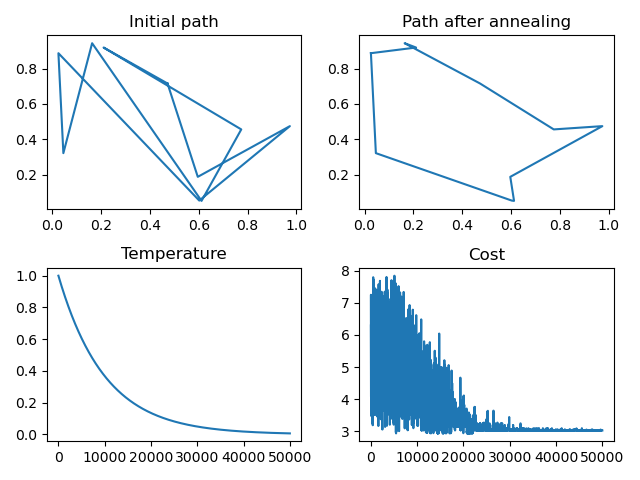

In [42]:
test_TSP(n = 10, T = 1, max_iter = 50000, rate = 0.9999, distribution = "uniform", swap = arbitrary_swap)

<IPython.core.display.Javascript object>


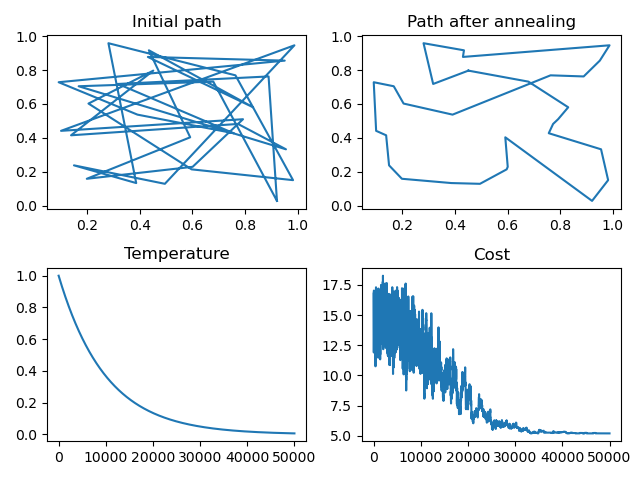

In [43]:
test_TSP(n = 30, T = 1, max_iter = 50000, rate = 0.9999, distribution = "uniform", swap = arbitrary_swap)

<IPython.core.display.Javascript object>


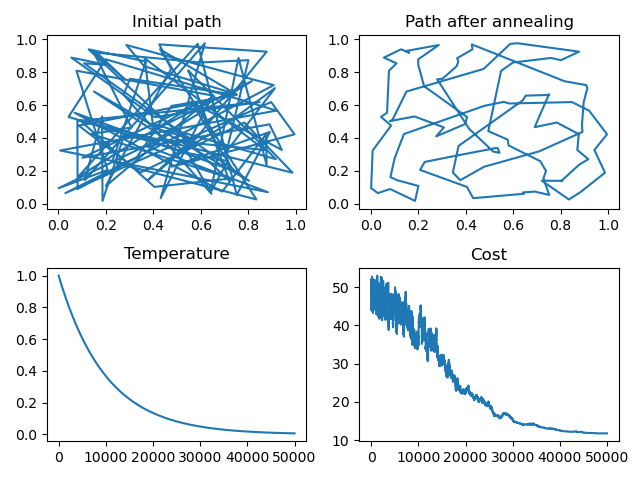

In [44]:
test_TSP(n = 100, T = 1, max_iter = 50000, rate = 0.9999, distribution = "uniform", swap = arbitrary_swap)

Jak widać algorytm radzi sobie dosc dobrze dla małych wartości n jednak gdy n rośnie algorytm już prawie nigdy nie jest w stanie znaleźc najlepszego rozwiazania.

Nastepnie przeanalizujemy jak algorytm radzi sobie w przypadku generacji sasiedniego stanu za pomocą consecutive swap.


<IPython.core.display.Javascript object>


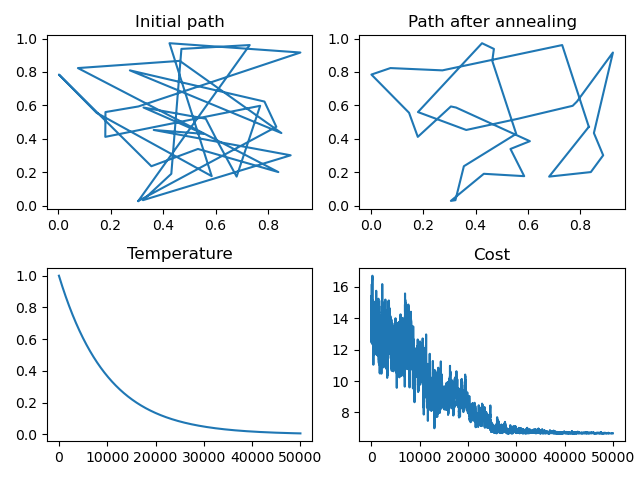

In [45]:
test_TSP(n = 30, T = 1, max_iter = 50000, rate = 0.9999, distribution = "uniform", swap = consecutive_swap)

Jak widać koszt końcowy jest wyższy niż w przypadku arbitrary swap, wynik ten może zależeć od przyjetych hiperparametrów. 

Teraz przyjżyjmy się jak wyglada rozwiazanie dla chmur punktów z innych rozkladów, rozkladu normalnego oraz rozkladu z dziewięcioma odseparowanymi grupami punktów

<IPython.core.display.Javascript object>


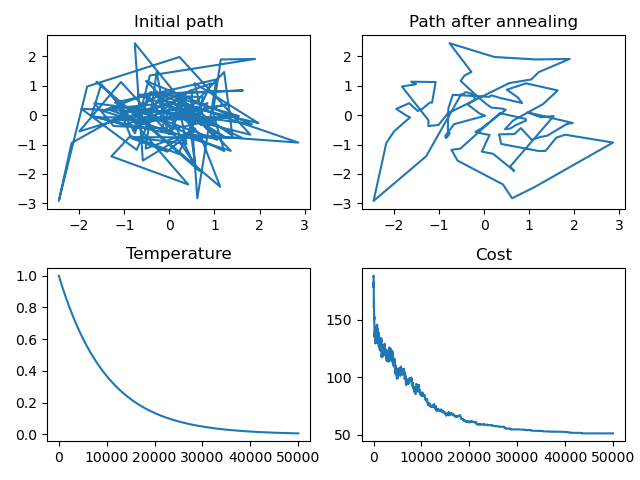

In [46]:
test_TSP(n = 100, T = 1, max_iter = 50000, rate = 0.9999, distribution = "normal", swap = arbitrary_swap)

<IPython.core.display.Javascript object>


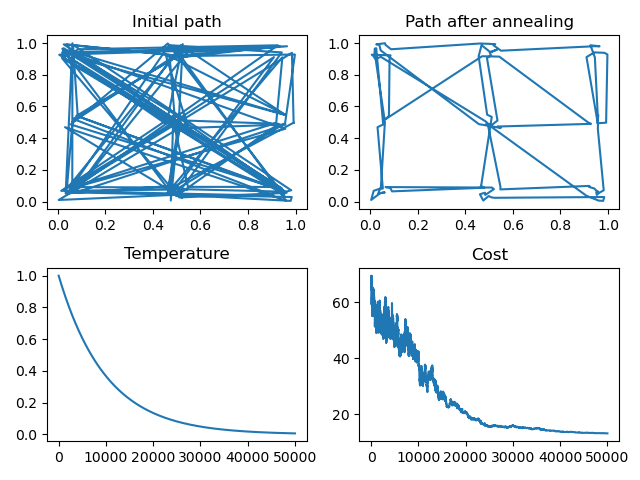

In [47]:
test_TSP(n = 100, T = 1, max_iter = 50000, rate = 0.9999, distribution = "groups", swap = arbitrary_swap)

Na koniec możemy spojrzeć na rozwiązanie w którym bedziemy troche inaczej modyfikować temperature. W tym rozwiazaniu bedziemy kilkukrotnie podgrzewać temperature po to aby zwiekszyć losowośc algorytmu. Jak widać poniżej wynik jest gorszy niż w przypadku braku podgrzewania. Probowałem różnych sposobów podgrzewania (podgrzewanie o stała wartośc, podrzewanie o wartośc coraz mniejszą, podgrzewanie po określonej liczbie iteracji bez zmiany stanu) i w żadnym z nich nie udało uzyskać mi się wyniku lepszego niż bez podgrzewania chociaż czesto koszty wynikowe są zbliżone.

<IPython.core.display.Javascript object>


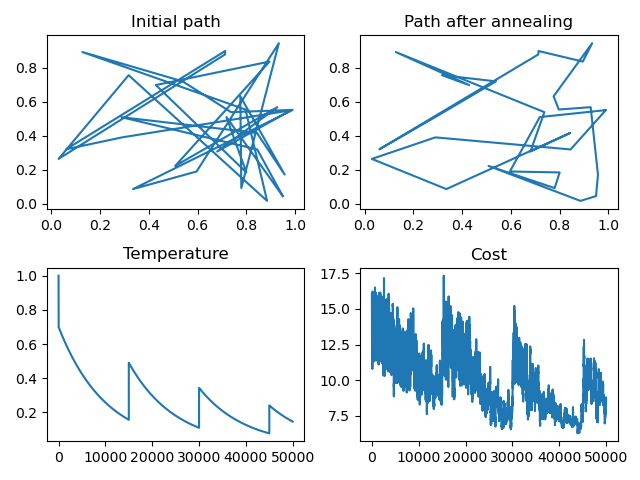

In [48]:
test_TSP(n = 30, T = 1, max_iter = 50000, rate = 0.9999, distribution = "uniform", swap = arbitrary_swap,heating = True)